In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

108
[[2005]
 [2013]]
[[101.310600280762]
 [99.0333786010742]]


/home/logan/miniconda3/envs/csi4106/lib/python3.8/site-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)
/home/logan/miniconda3/envs/csi4106/lib/python3.8/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/home/logan/.local/lib/python3.8/site-packages/numpy/ma/core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different 

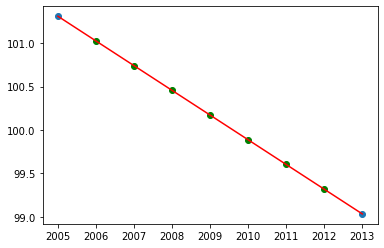

[[2013]
 [2014]]
[[99.0333786010742]
 [99.502082824707]]


ValueError: x and y must be the same size

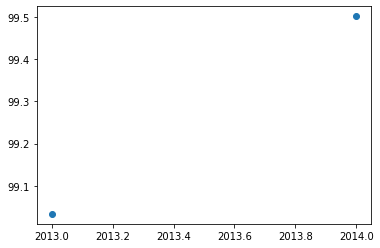

In [22]:
# Manual imputer

data = pd.read_csv('Education_cleaning_test.csv')  # load data set
print(len(data))

# for row in range(len(data)):
#   row = data.iloc[row, :].values.reshape(-1,1)
#   print(row)


categories = data.columns[5:].astype(int).values.reshape(-1,1)
row = data.iloc[20, :].values.reshape(-1,1)[5:]


start = -1
end = 0
missing = []
while end < len(row):
  if math.isnan(row[end]):
    row = np.delete(row, end)
    missing.append([categories[end]])
    categories = np.delete(categories, end)
  else:
    if start == -1:
      start = end
    else:
      linear_regressor = LinearRegression()  # create object for the class
      categories_window = categories[start:end+1].reshape(-1,1)
      row_window = row[start:end+1].reshape(-1,1)
      print('======')
      print(categories_window)
      print(row_window)
      print('======')
      linear_regressor.fit(categories_window, row_window)  # perform linear regression
      Y_pred = linear_regressor.predict(categories_window)
      
      imputed_values = linear_regressor.predict(missing)
      plt.scatter(categories_window, row_window)
      plt.scatter(missing, imputed_values, c='green')
      plt.plot(categories_window, Y_pred, color='red')
      plt.show()
      missing = []
      start = end
    end += 1

print(missing)
row = row.reshape(-1,1)
categories = categories.reshape(-1,1)
missing = missing.reshape(1,-1)
#X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
#Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column


# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(categories, row)  # perform linear regression
# Y_pred = linear_regressor.predict(categories)  # make predictions


# imputed_values = linear_regressor.predict([missing])


# plt.scatter(categories, row )
# plt.scatter(missing, imputed_values, c='green')
# plt.plot(categories, Y_pred, color='red')
# plt.show()


In [182]:
test_data = pd.read_csv('Education_cleaning_test.csv')
# print(len(test_data))

categories = test_data.columns[:5].values.reshape(-1,1).flatten()
# print(categories)

numerical_test_data = test_data.drop(columns=categories, axis=1)
# print(numerical_test_data.head)

imputer = SimpleImputer(strategy="median")
imputer.fit(numerical_test_data)

sample_incomplete_rows = data[data.isnull().any(axis=1)].head()

# transform the dataset to have the computed median
input_x = imputer.transform(numerical_test_data)
# creating the dataframe from the 2D numpy array
imputed_data = pd.DataFrame(input_x, columns=numerical_test_data.columns, index=numerical_test_data.index)

# see what is imputed into the missing value cells
print(imputed_data.loc[sample_incomplete_rows.index.values])
print(numerical_test_data.head())
print(imputed_data.head())


        2005       2006       2007       2008       2009      2010       2011  \
0  82.304077  79.638752  90.228012  90.128086  91.263733  88.09304  91.168983   
1  82.304077  79.638752  90.228012  90.128086  91.263733  88.09304  91.168983   
2  82.304077  79.638752  90.228012  90.128086  91.263733  88.09304  91.168983   
3  82.304077  79.638752  90.228012  90.128086  91.263733  88.09304  91.168983   
4  82.304077  79.638752  90.228012  90.128086  91.263733  88.09304  91.168983   

        2012       2013       2014       2015      2016       2017       2018  \
0  74.747639  93.327553  95.620468  94.882477  94.19249  97.930794  95.476341   
1  74.747639  93.327553  95.620468  94.882477  94.19249  97.930794  95.476341   
2  74.747639  93.327553  95.620468  94.882477  94.19249  97.930794  95.476341   
3  74.747639  93.327553  95.620468  94.882477  94.19249  97.930794  95.476341   
4  74.747639  93.327553  95.620468  94.882477  94.19249  97.930794  95.476341   

         2019       2020  